## Week 10 - Session 1 : Recommendation System 

## 1. Load Data 

In [1]:
import numpy as np
import pandas as pd

d_movies = pd.read_csv("./ml-latest-small/movies.csv", verbose=1)
d_ratings = pd.read_csv("./ml-latest-small/ratings.csv", verbose=1)

Tokenization took: 10.41 ms
Type conversion took: 13.38 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 63.95 ms
Type conversion took: 44.52 ms
Parser memory cleanup took: 0.03 ms


### 1.1. Check Data

In [2]:
print("# Movies: {}".format(len(d_movies.movieId.unique())))
d_movies.head()

# Movies: 9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print("# Users: {}".format(len(d_ratings.userId.unique())))
d_ratings.head()

# Users: 610


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 1.2. Plot Distribution of User Ratings

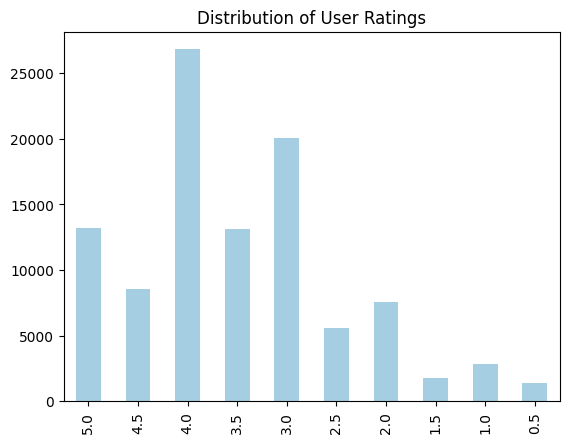

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

d_ratings.rating.value_counts().sort_index(ascending=False).plot(kind='bar', colormap='Paired')
plt.title("Distribution of User Ratings")
plt.show()

## 2. Generate User-Movie Rating Matrix

Generate a $u*m$ user-movie rating matrix where $u$ is the number of users and $m$ is the number of movies rated.

In [5]:
m_ratings = d_ratings.pivot(index = 'userId', columns ='movieId', values = 'rating') # .fillna(0)
m_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# fill 0 where there is no rating (NaN)
m_ratings = m_ratings.fillna(0)
m_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Perform Singular Value Decomposition (SVD)

In [7]:
from scipy.sparse.linalg import svds

num_latent = 2
u, s, vt = svds(m_ratings.to_numpy(), k=num_latent)

print("u.shape = {}".format(u.shape))
print("s.shape = {}".format(np.diag(s).shape))
print("vt.shape = {}".format(vt.shape))

u.shape = (610, 2)
s.shape = (2, 2)
vt.shape = (2, 9724)


* The matrix $u$ has userIds in its rows and latent features in it columns, which shows the relationship between the user and the latent feature. Here, the latent feature can be interpreted as a genre of the movie and as a result, the matrix let us know the degree of interest the user have in a specific genre.
* The matrix $s$ is the weight of latent features.
* The matrix $vt$ has latent features and movies in its rows and columns, respectively.

### 3.1. Plot Latent Space

<IPython.core.display.Javascript object>


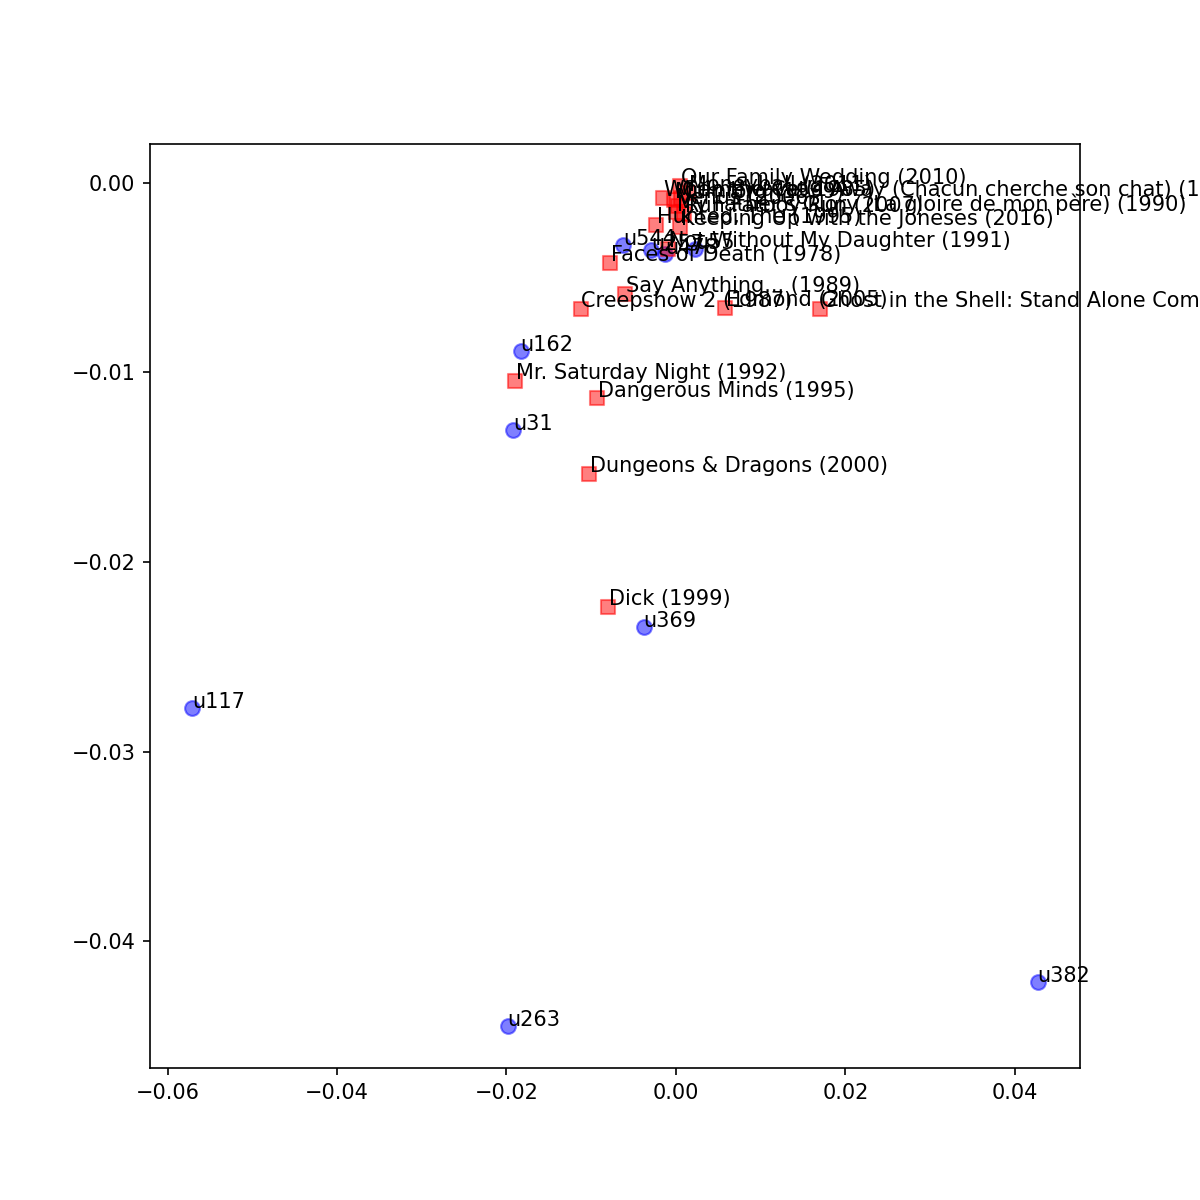

In [8]:
import random
random.seed(5)
# %matplotlib widget
%matplotlib notebook
import matplotlib.pyplot as plt

# prepare plot data
users = {}
for i in range(1,u.shape[0]+1):
    users['u{}'.format(i)] = u[i-1]
        
movie_list = d_movies.title.tolist()
v = vt.T
movies = {}
for i in range(1,v.shape[0]+1):
    movies[movie_list[i-1]] = v[i-1]

# initialize plot
fig, ax = plt.subplots(figsize=(8,8))

# plot user data
n_users = 10
selected_users = random.sample(range(1,len(users)+1), n_users)

x = np.array([arr[0] for arr in list(users.values())])[selected_users]
y = np.array([arr[1] for arr in list(users.values())])[selected_users]
key = np.array(list(users.keys()))[selected_users]

ax.scatter(x, y, s=50, color='b', alpha=0.5, marker="o")

for i, txt in enumerate(key):
    ax.annotate(txt, (x[i], y[i])) 
    
# plot movie data
n_movies = 20
selected_movies = random.sample(range(1,len(movies)+1), n_movies)

x = np.array([arr[0] for arr in list(movies.values())])[selected_movies]
y = np.array([arr[1] for arr in list(movies.values())])[selected_movies]
key = np.array(list(movies.keys()))[selected_movies]

ax.scatter(x, y, s=50, color='red', alpha=0.5, marker="s")

for i, txt in enumerate(key):
    ax.annotate(txt, (x[i]+.0001, y[i]+.0001))

* We can observe from the plot that this latent space shows the relationship among the users, among the movies, or between users and movies. For example, if user A is close to movie A, then we can assume that the user gave high rating for the movie. If two users are close, then we can assume that they have the similar taste of movie.

## 4. Calculate RMSE

In [9]:
%%time
from math import sqrt
from sklearn.metrics import mean_squared_error

# The original user-movie rating matrix
ratings = m_ratings.values
num_latents = [2,10,50,100,200,500]
svd_results = {}

for k in num_latents: 
    u, s, vt = svds(m_ratings.to_numpy(), k=k)

    # The Predicted rating matrix 
    ratings_pred = np.dot(np.dot(u, np.diag(s)), vt)

    prediction = ratings_pred[ratings.nonzero()].flatten() 
    ground_truth = ratings[ratings.nonzero()].flatten()

    print("k={}, RMSE={}".format(k, sqrt(mean_squared_error(prediction, ground_truth))))
    svd_results[k] = ratings_pred

k=2, RMSE=2.9043370704807714
k=10, RMSE=2.5497370556718173
k=50, RMSE=1.9977039849981708
k=100, RMSE=1.5821660244906888
k=200, RMSE=1.0262920391841757
k=500, RMSE=0.1699597490544188
CPU times: user 29.3 s, sys: 2.09 s, total: 31.4 s
Wall time: 1min 1s


In [10]:
best_k = 500
ratings_pred = svd_results[best_k]

d_pred = pd.DataFrame(ratings_pred, columns=m_ratings.columns)
d_pred.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,3.997324,0.010268,4.053735,-0.008847,-0.003309,3.987238,0.031851,-0.018227,-0.013231,-0.068527,...,0.000107,0.000092,0.000123,0.000123,0.000107,0.000123,0.000107,0.000107,0.000107,-0.002165
1,-0.005106,-0.014335,-0.019974,0.045455,-0.123441,-0.081889,0.074901,0.001649,0.028907,0.008953,...,-0.017960,-0.015395,-0.020526,-0.020526,-0.017960,-0.020526,-0.017960,-0.017960,-0.017960,-0.032190
2,-0.001580,0.029209,0.003733,-0.013874,0.027942,-0.049884,0.012857,0.066866,-0.066197,0.014236,...,0.005293,0.004537,0.006049,0.006049,0.005293,0.006049,0.005293,0.005293,0.005293,-0.005146
3,-0.008157,-0.010596,0.016286,-0.001466,0.036886,0.005489,0.007005,-0.023275,-0.006785,-0.016639,...,0.000457,0.000391,0.000522,0.000522,0.000457,0.000522,0.000457,0.000457,0.000457,0.003917
4,4.162242,-0.010243,0.108417,-0.081964,0.370600,0.007549,0.070520,0.005857,-0.153323,-0.148666,...,0.003983,0.003414,0.004552,0.004552,0.003983,0.004552,0.003983,0.003983,0.003983,0.026316


* We can observe that a larger number of latent features have better performance.

## 5. Movie Recommendations

In [11]:
def recommend_movies(preds_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {} has already rated {} movies'.format(userID, user_full.shape[0]))
    print('Recommending highest {} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [12]:
# randomly select one user for evaluation
user_idx = random.choice(d_ratings.userId.unique().tolist())
already_rated, predictions = recommend_movies(d_pred, user_idx, d_movies, d_ratings, 10)

User 6 has already rated 314 movies
Recommending highest 10 predicted ratings movies not already rated.


In [13]:
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
143,6,318,5.0,845553200,"Shawshank Redemption, The (1994)",Crime|Drama
172,6,364,5.0,845553317,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
244,6,587,5.0,845553381,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller
165,6,356,5.0,845553200,Forrest Gump (1994),Comedy|Drama|Romance|War
279,6,780,5.0,845556915,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
280,6,783,5.0,845554584,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance
111,6,257,5.0,845554176,Just Cause (1995),Mystery|Thriller
159,6,350,5.0,845553489,"Client, The (1994)",Drama|Mystery|Thriller
158,6,349,5.0,845553146,Clear and Present Danger (1994),Action|Crime|Drama|Thriller
1,6,3,5.0,845554296,Grumpier Old Men (1995),Comedy|Romance


In [14]:
predictions

,movieId,title,genres
84,193,Showgirls (1995),Drama
174,421,Black Beauty (1994),Adventure|Children|Drama
73,169,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
739,1370,Die Hard 2 (1990),Action|Adventure|Thriller
1231,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance
857,1552,Con Air (1997),Action|Adventure|Thriller
2310,3510,Frequency (2000),Drama|Thriller
134,319,Shallow Grave (1994),Comedy|Drama|Thriller
3,14,Nixon (1995),Drama
3476,5299,My Big Fat Greek Wedding (2002),Comedy|Romance


* The user gave high ratings to the movies with genres 'Drama' and the recommendation shows the similar pattern where most of them are 'Drama'.